###  Import

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
from time import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

In [3]:
# Import cleaned dataset
df = pd.read_csv('persistence/cleaned_data_2018-06-19.csv', parse_dates=True, index_col='date')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41757 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 7 columns):
pm25          41757 non-null float64
dewp          41757 non-null int64
temp          41757 non-null float64
pres          41757 non-null float64
wind_speed    41757 non-null float64
snow_hours    41757 non-null int64
rain_hours    41757 non-null int64
dtypes: float64(4), int64(3)
memory usage: 2.5 MB


###  EDA

In [5]:
df.describe()

,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


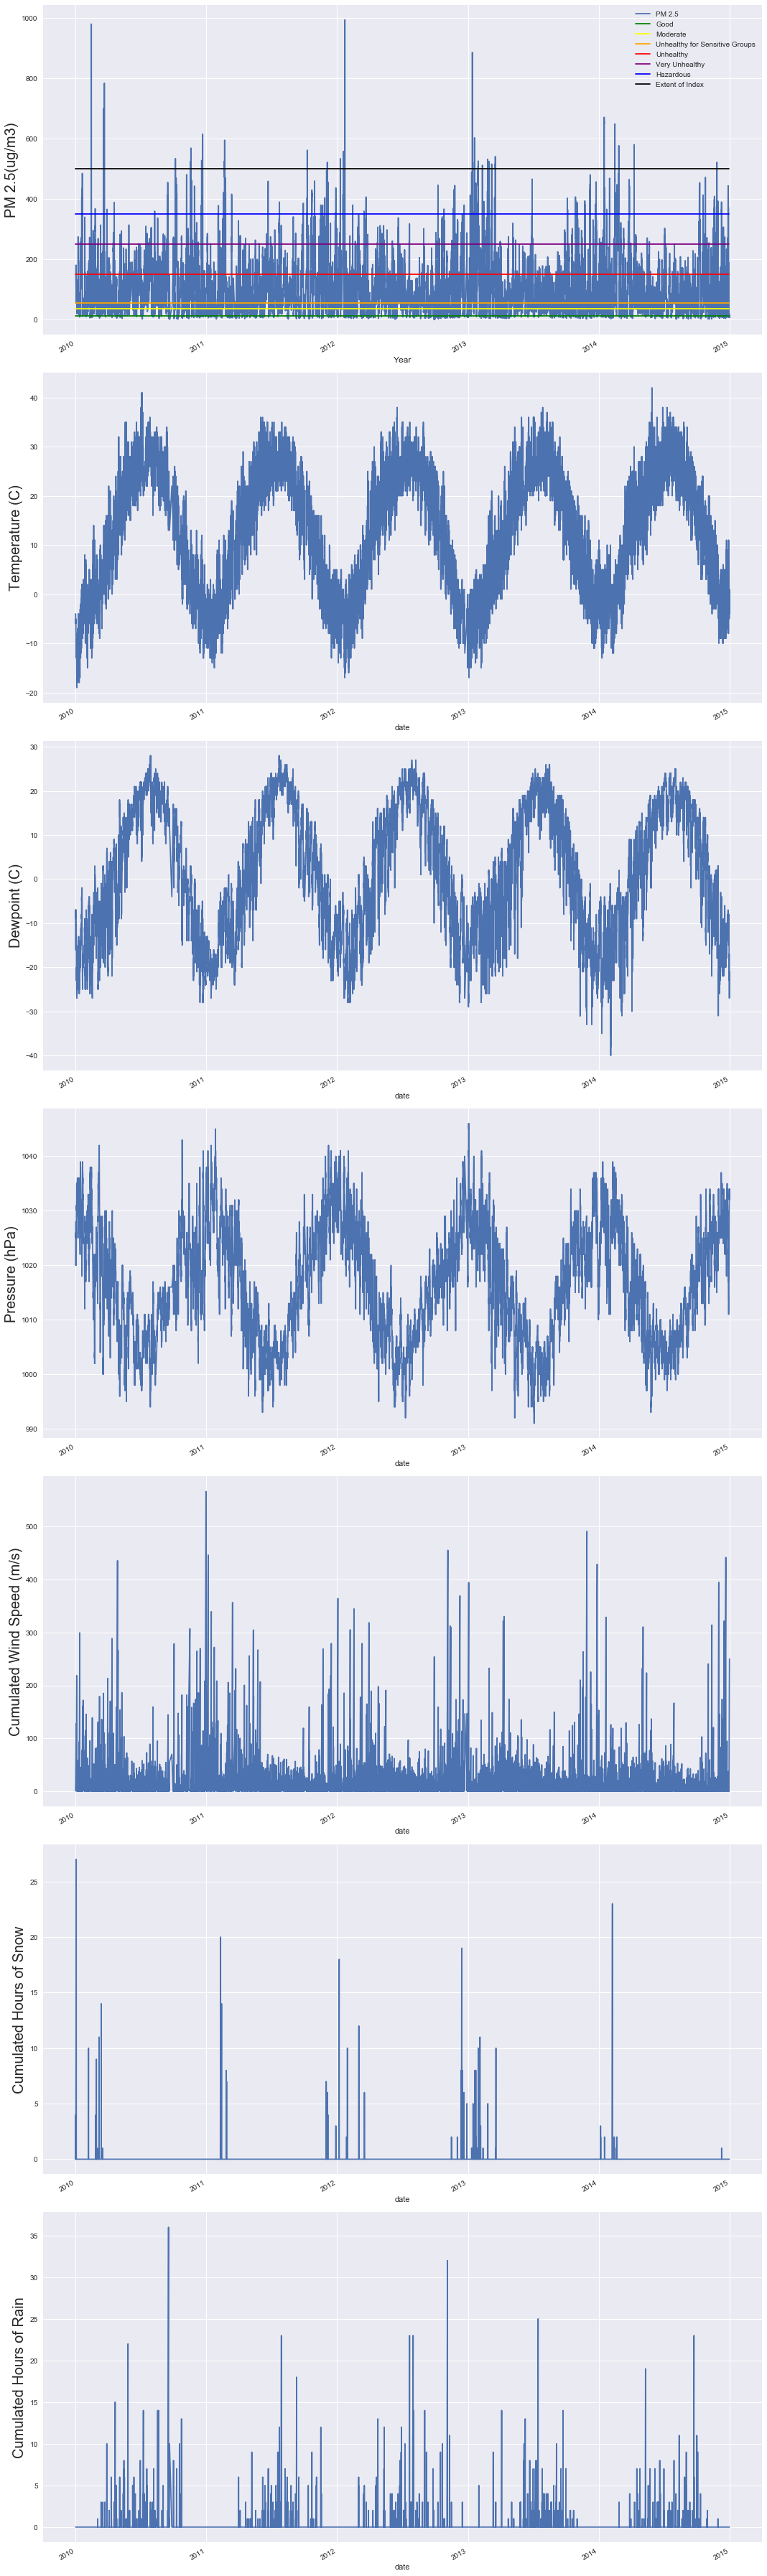

In [13]:
# Let's look at all of the time series
plt.figure(figsize=(15, 50))
plt.subplot(7,1,1)
df['pm25'].plot()
plt.ylabel('PM 2.5(ug/m3)', fontsize=20)
plt.xlabel('Year', fontsize=12)
plt.plot(['2010-01-01', '2014-12-31'],['12', '12'], color='green')
plt.plot(['2010-01-01', '2014-12-31'],['35.4', '35.4'], color='yellow')
plt.plot(['2010-01-01', '2014-12-31'],['55.4', '55.4'], color='orange')
plt.plot(['2010-01-01', '2014-12-31'],['150.4', '150.4'], color='red')
plt.plot(['2010-01-01', '2014-12-31'],['250.4', '250.4'], color='purple')
plt.plot(['2010-01-01', '2014-12-31'],['350.4', '350.4'], color='blue')
plt.plot(['2010-01-01', '2014-12-31'],['500', '500'], color='black')
plt.legend(['PM 2.5', 'Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous', 'Extent of Index'])
# legend based on updated 2012 EPA PM 2.5 standard

plt.subplot(7,1,2)
df['temp'].plot()
plt.ylabel('Temperature (C)', fontsize=20)

plt.subplot(7,1,3)
df['dewp'].plot()
plt.ylabel('Dewpoint (C)', fontsize=20)

plt.subplot(7,1,4)
df['pres'].plot()
plt.ylabel('Pressure (hPa)', fontsize=20)

plt.subplot(7,1,5)
df['wind_speed'].plot()
plt.ylabel('Cumulated Wind Speed (m/s)', fontsize=20)

plt.subplot(7,1,6)
df['snow_hours'].plot()
plt.ylabel('Cumulated Hours of Snow', fontsize=20) 

plt.subplot(7,1,7)
df['rain_hours'].plot()
plt.ylabel('Cumulated Hours of Rain', fontsize=20) 

plt.tight_layout();

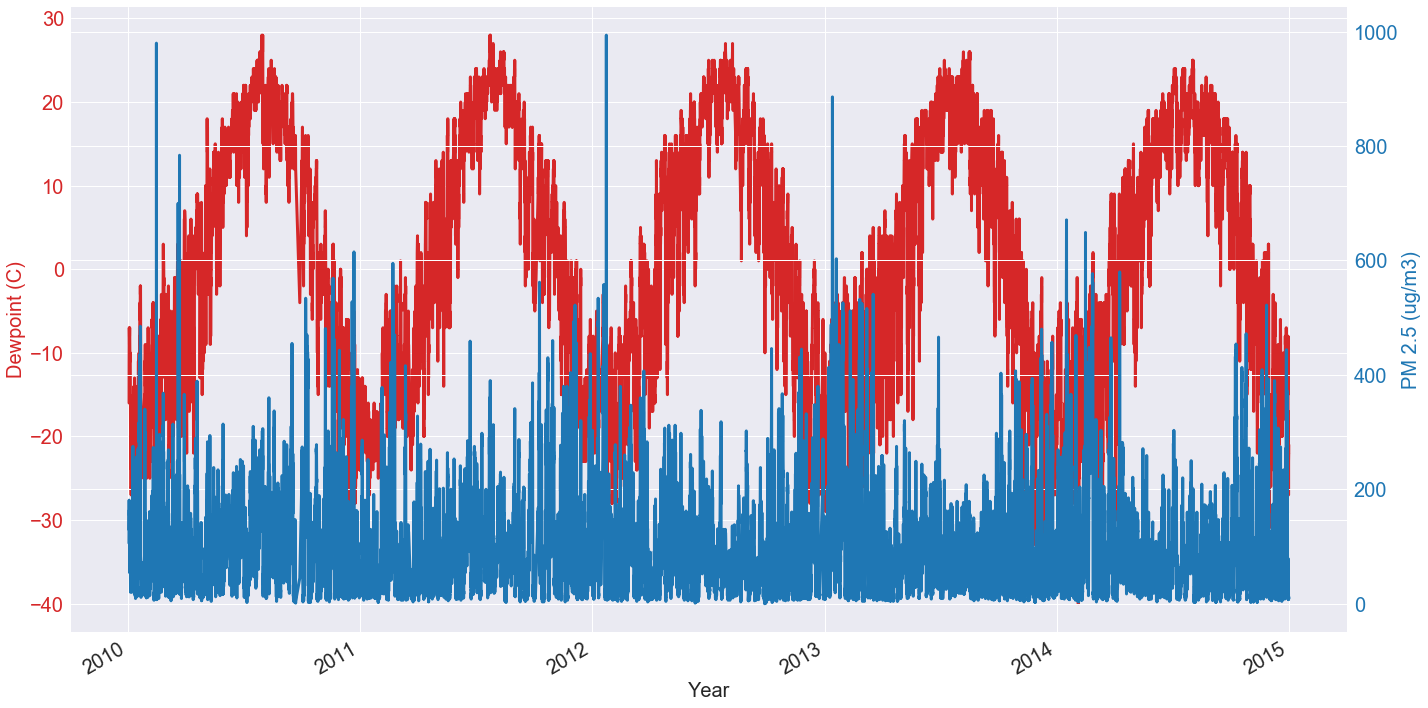

In [8]:
# Look for correlation between pm25 and dewpoint
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['dewp']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Dewpoint (C)', fontsize=20, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
df[['pm25']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=20, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();  

- As expected, `dewpoint` and `pm2.5` appear anti-correlated.
- Both have a pronounced seasonal component.

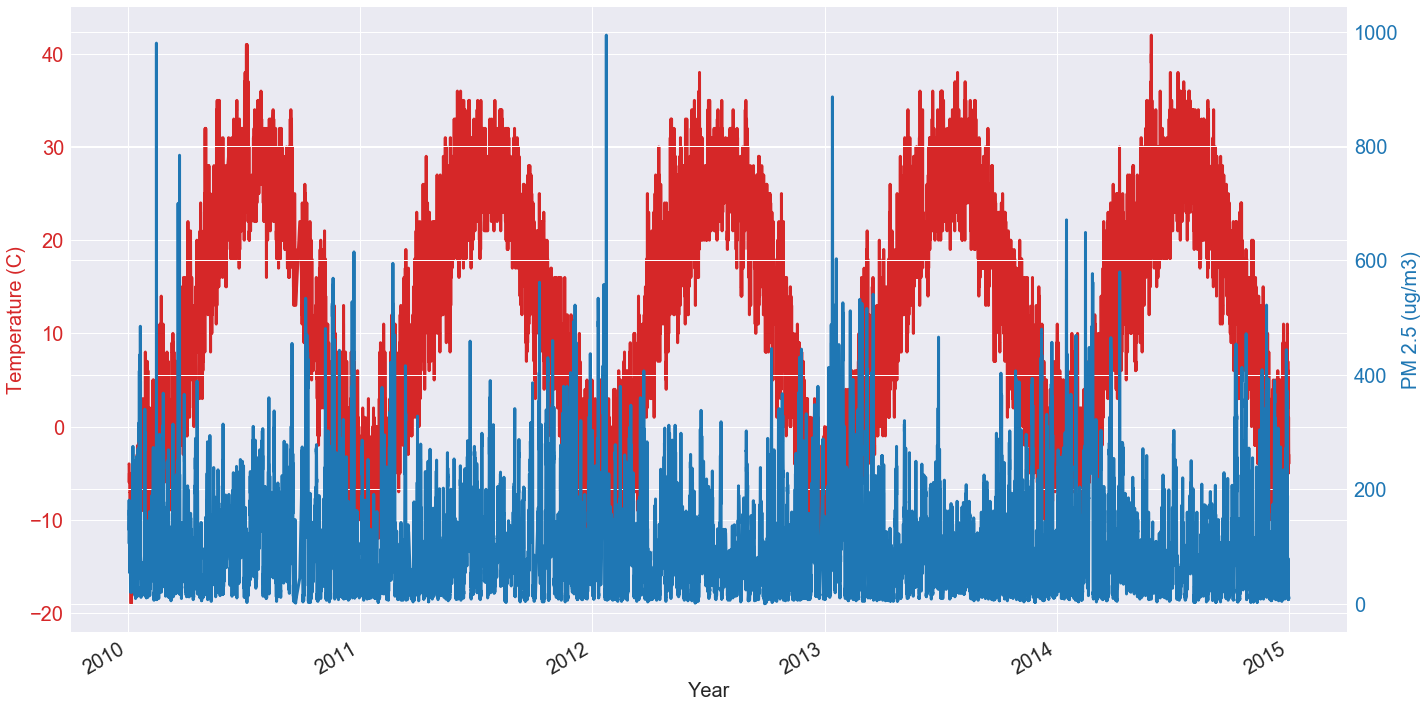

In [9]:
# Look for correlation between pm25 and temperature
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['temp']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Temperature (C)', fontsize=20, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=20, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();  

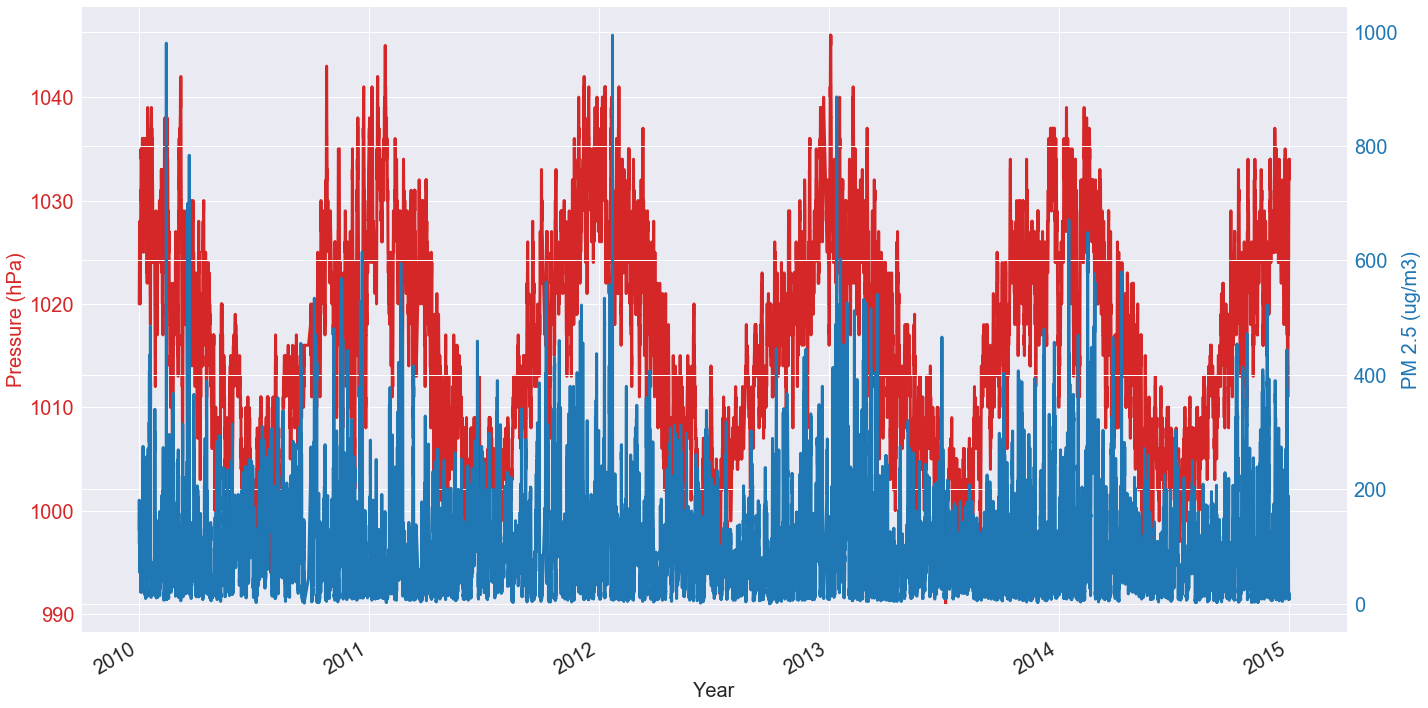

In [10]:
# Look for correlation between pm25 and pressure
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['pres']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Pressure (hPa)', fontsize=20, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=20, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();  

- Surface pressure and PM 2.5 correlate well and have similar seasonality.

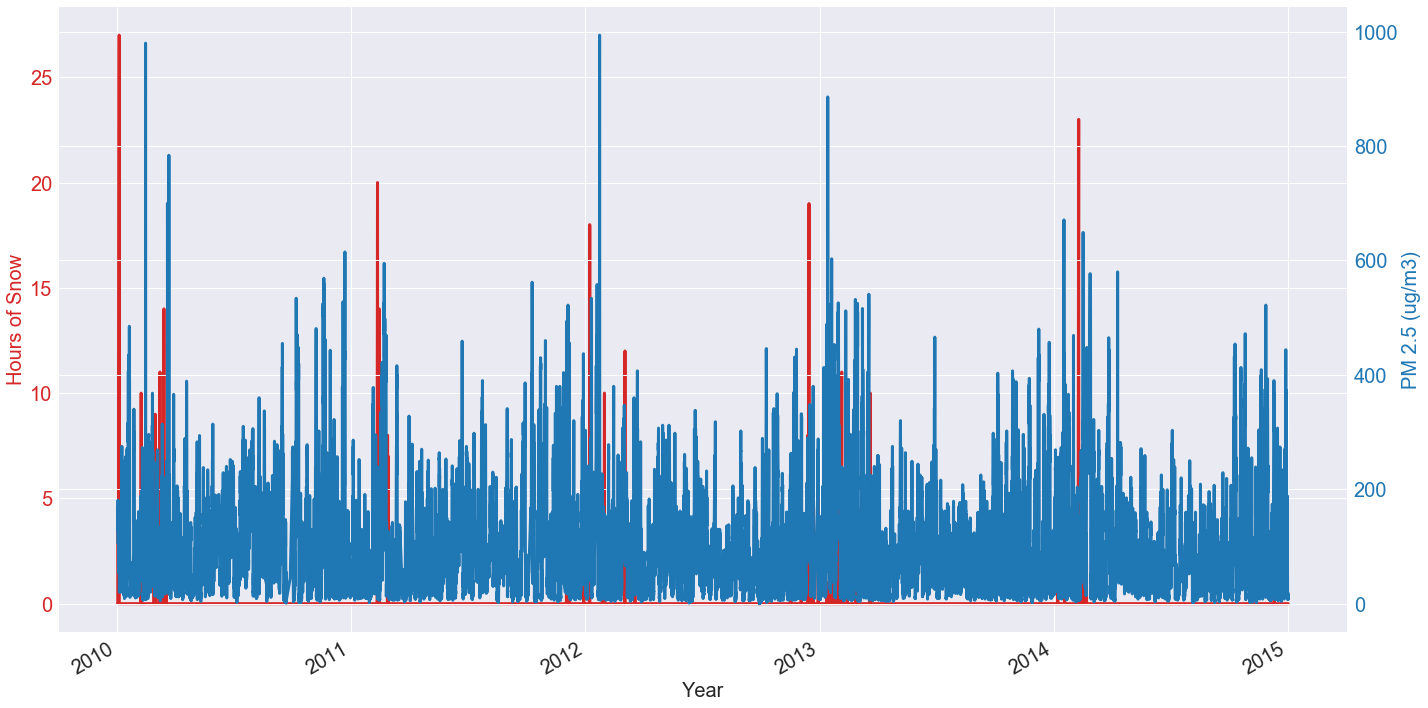

In [11]:
# Look for correlation between pm25 and snow hours
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['snow_hours']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Hours of Snow', fontsize=20, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=20, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();  

- `pm2.5` peaks lag behind snowfall.

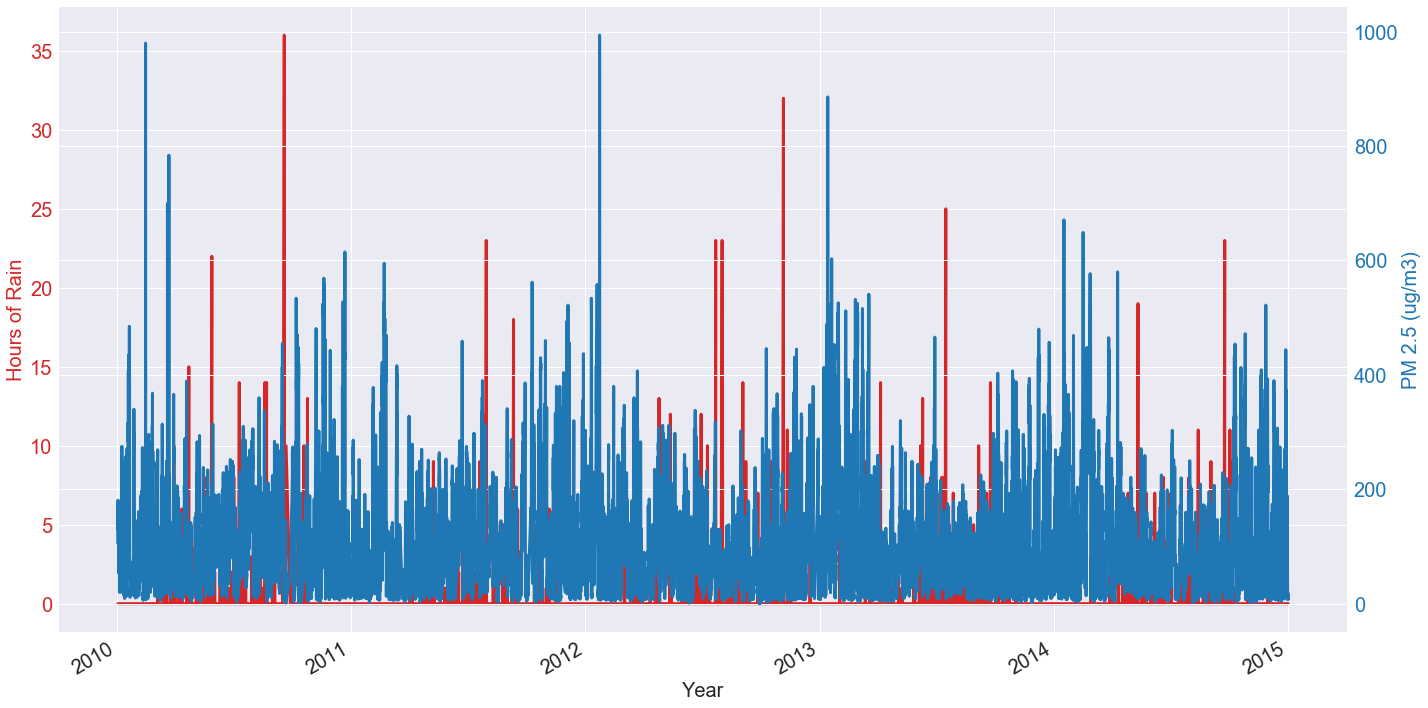

In [12]:
# Look for correlation between pm25 and rain hours
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['rain_hours']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Hours of Rain', fontsize=20, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=20, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();  

- `pm2.5` peaks appear anticorelated with rainfall, as expected (rain pulls pm2.5 out of the atmosphere). 

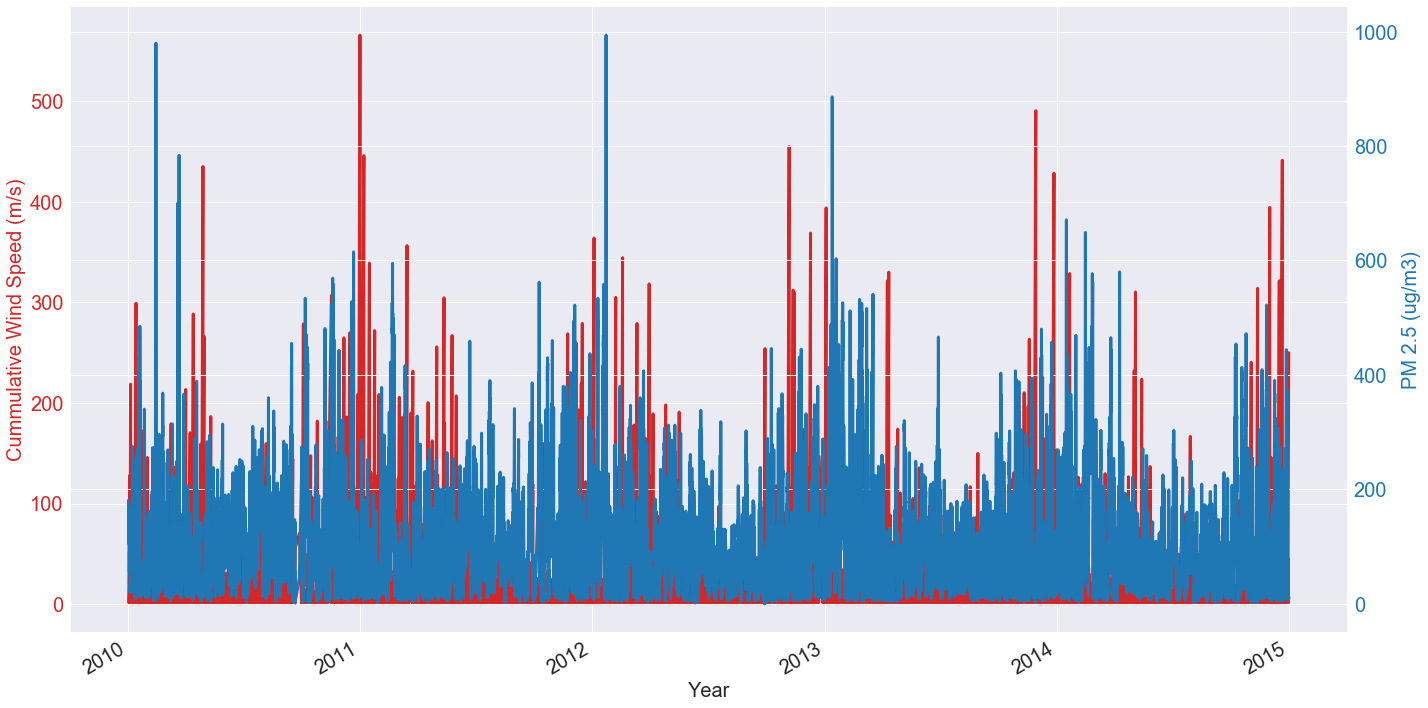

In [13]:
# Look for correlation between pm25 and cummulative wind speed
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['wind_speed']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Cummulative Wind Speed (m/s)', fontsize=20, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=20, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout(); 

- The seasonality of `pm2.5` and `wind-speed` appear to align nicely. The `pm2.5` peaks appear to slightly lag behind the wind speed peaks. 

In [14]:
# Let's look at the computed correlation coefficients between each time series
df.corr()

,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
pm25,1.000000,0.171423,-0.090534,-0.047282,-0.247784,0.019266,-0.051369
dewp,0.171423,1.000000,0.823821,-0.777722,-0.293106,-0.034925,0.125341
temp,-0.090534,0.823821,1.000000,-0.826903,-0.149613,-0.094785,0.049544
pres,-0.047282,-0.777722,-0.826903,1.000000,0.178871,0.070537,-0.080532
wind_speed,-0.247784,-0.293106,-0.149613,0.178871,1.000000,0.022630,-0.009157
snow_hours,0.019266,-0.034925,-0.094785,0.070537,0.022630,1.000000,-0.009764
rain_hours,-0.051369,0.125341,0.049544,-0.080532,-0.009157,-0.009764,1.000000


The strongest correlations for `pm2.5` are a negative correlation with `wind-speed` (-0.25) and a positive correlation with `dewpoint` (0.17). 

We must keep in mind that these correlation coefficients combine seasonal and trend effects. Let's look at the correlation coefficients after the trends have been removed.

In [15]:
# What are coefficients once the trends have been removed?
df.diff().corr() 

,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
pm25,1.000000,0.152631,-0.072160,-0.018048,-0.028696,-0.003552,-0.015152
dewp,0.152631,1.000000,-0.244363,0.013495,-0.088640,0.005566,0.013475
temp,-0.072160,-0.244363,1.000000,-0.186423,0.065832,-0.003655,-0.035547
pres,-0.018048,0.013495,-0.186423,1.000000,-0.005686,0.001088,0.013391
wind_speed,-0.028696,-0.088640,0.065832,-0.005686,1.000000,0.008802,-0.008155
snow_hours,-0.003552,0.005566,-0.003655,0.001088,0.008802,1.000000,-0.002883
rain_hours,-0.015152,0.013475,-0.035547,0.013391,-0.008155,-0.002883,1.000000


Once the trends have been removed, we see the strongest correlation with `pm2.5` is the positive correlation with `dewpoint` (0.15). The negative correlation with `wind speed` had shrunk significantly. 